#21MIS1114 ASSIGNMENT-4

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#Load the dataset

Considering the problem as classification problem and still keeping the values as is i.e., not conveting into classes like good/bad and considering it as multiclass classification problem

In [186]:
df=pd.read_csv("/content/winequality-red.csv")

#Check info and statistical ananlysis
**to get basic underestanding**

In [187]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [189]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [190]:
df.quality.value_counts() #as the dependent varibale values are skewed we might need to go for undersampling/resampling

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [191]:
df.shape

(1599, 12)

#Handling Null values

In [192]:
#Lets remove null values if any
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#Outlier Removal/Handling

In [193]:
#Lets remove outliers if any
int_col=[col for col in df.columns if df[col].dtype!='O']
int_col

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

<Axes: >

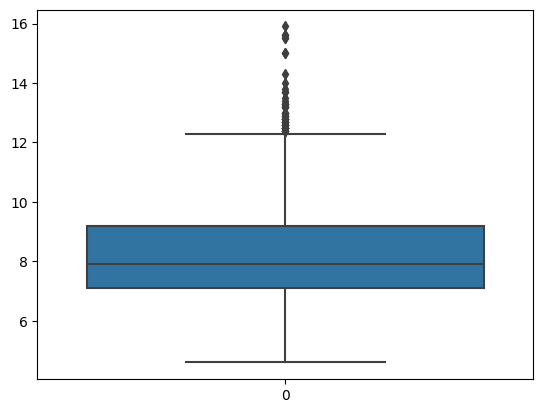

In [194]:
sns.boxplot(df[int_col[0]])

In [195]:
for col in int_col:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  upper_limit=q3+1.5*iqr
  lower_limit=q1-1.5*iqr
  median=df[col].median()
  print(median)
  df[col]=np.where(df[col]<=lower_limit,median,np.where(df[col]>=upper_limit,median,df[col]))

7.9
0.52
0.26
2.2
0.079
14.0
38.0
0.99675
3.31
0.62
10.2
6.0


<Axes: >

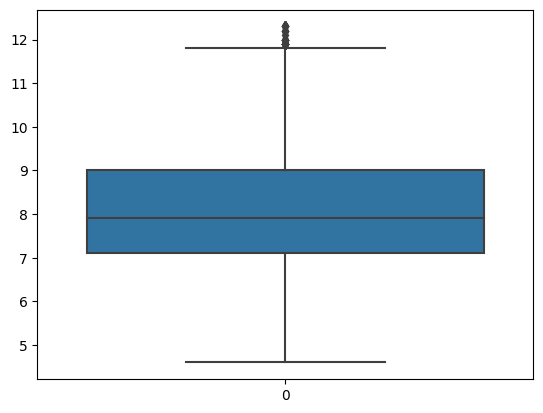

In [196]:
sns.boxplot(df[int_col[0]])


In [197]:
df.corr().quality.sort_values(ascending=True)

volatile acidity       -0.349090
total sulfur dioxide   -0.186096
chlorides              -0.154172
density                -0.150961
pH                     -0.057587
free sulfur dioxide    -0.057482
residual sugar          0.032971
fixed acidity           0.120012
citric acid             0.221375
sulphates               0.379741
alcohol                 0.457473
quality                 1.000000
Name: quality, dtype: float64

#Data Visualisation
Univariate,Bivariate and MultiVariate

<ipython-input-198-e8684199aa87>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.quality)


<Axes: xlabel='quality', ylabel='Density'>

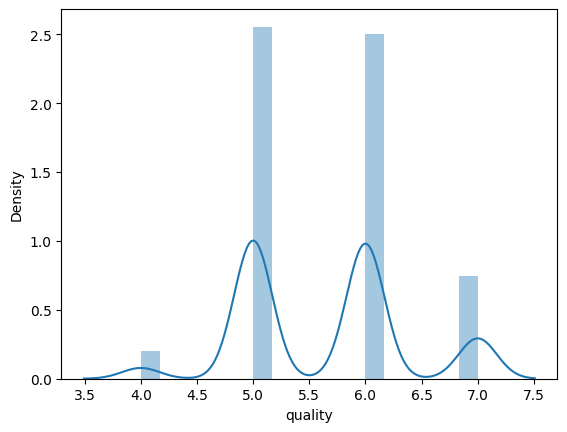

In [198]:
sns.distplot(df.quality)

<ipython-input-199-ce49f00db6f3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.chlorides)


<Axes: xlabel='chlorides', ylabel='Density'>

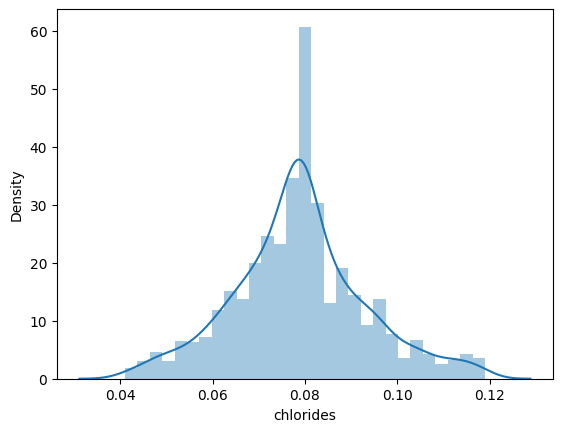

In [199]:
sns.distplot(df.chlorides)

<Axes: ylabel='quality'>

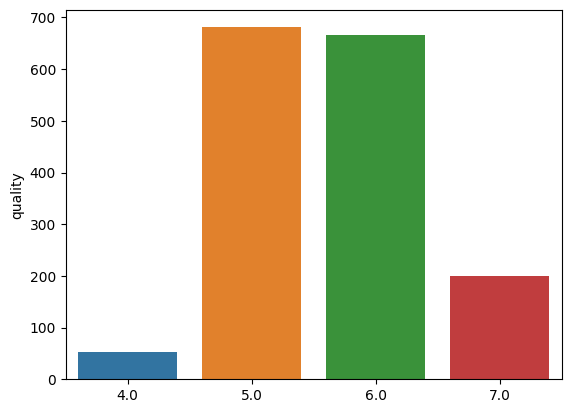

In [200]:
sns.barplot(x=df.quality.value_counts().index,y=df.quality.value_counts())

**Bivariate Analysis**

<Axes: xlabel='quality', ylabel='chlorides'>

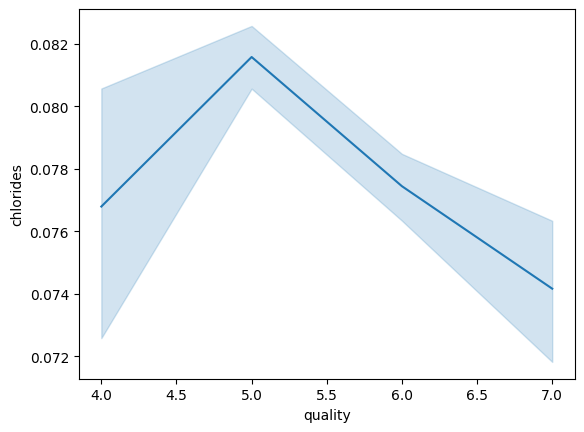

In [201]:
sns.lineplot(x=df.quality,y=df.chlorides)

<Axes: xlabel='quality', ylabel='chlorides'>

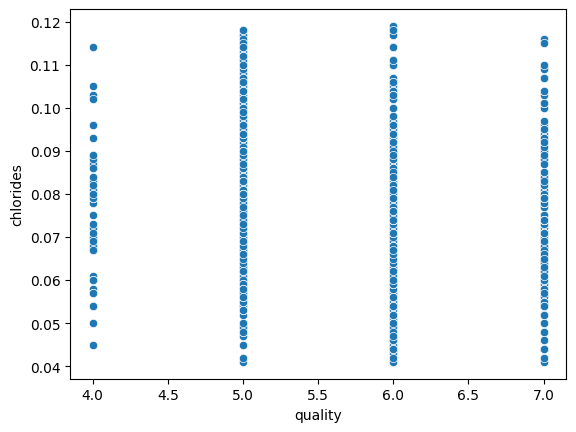

In [202]:
sns.scatterplot(x=df.quality,y=df.chlorides)

**Multivariate Analysis**

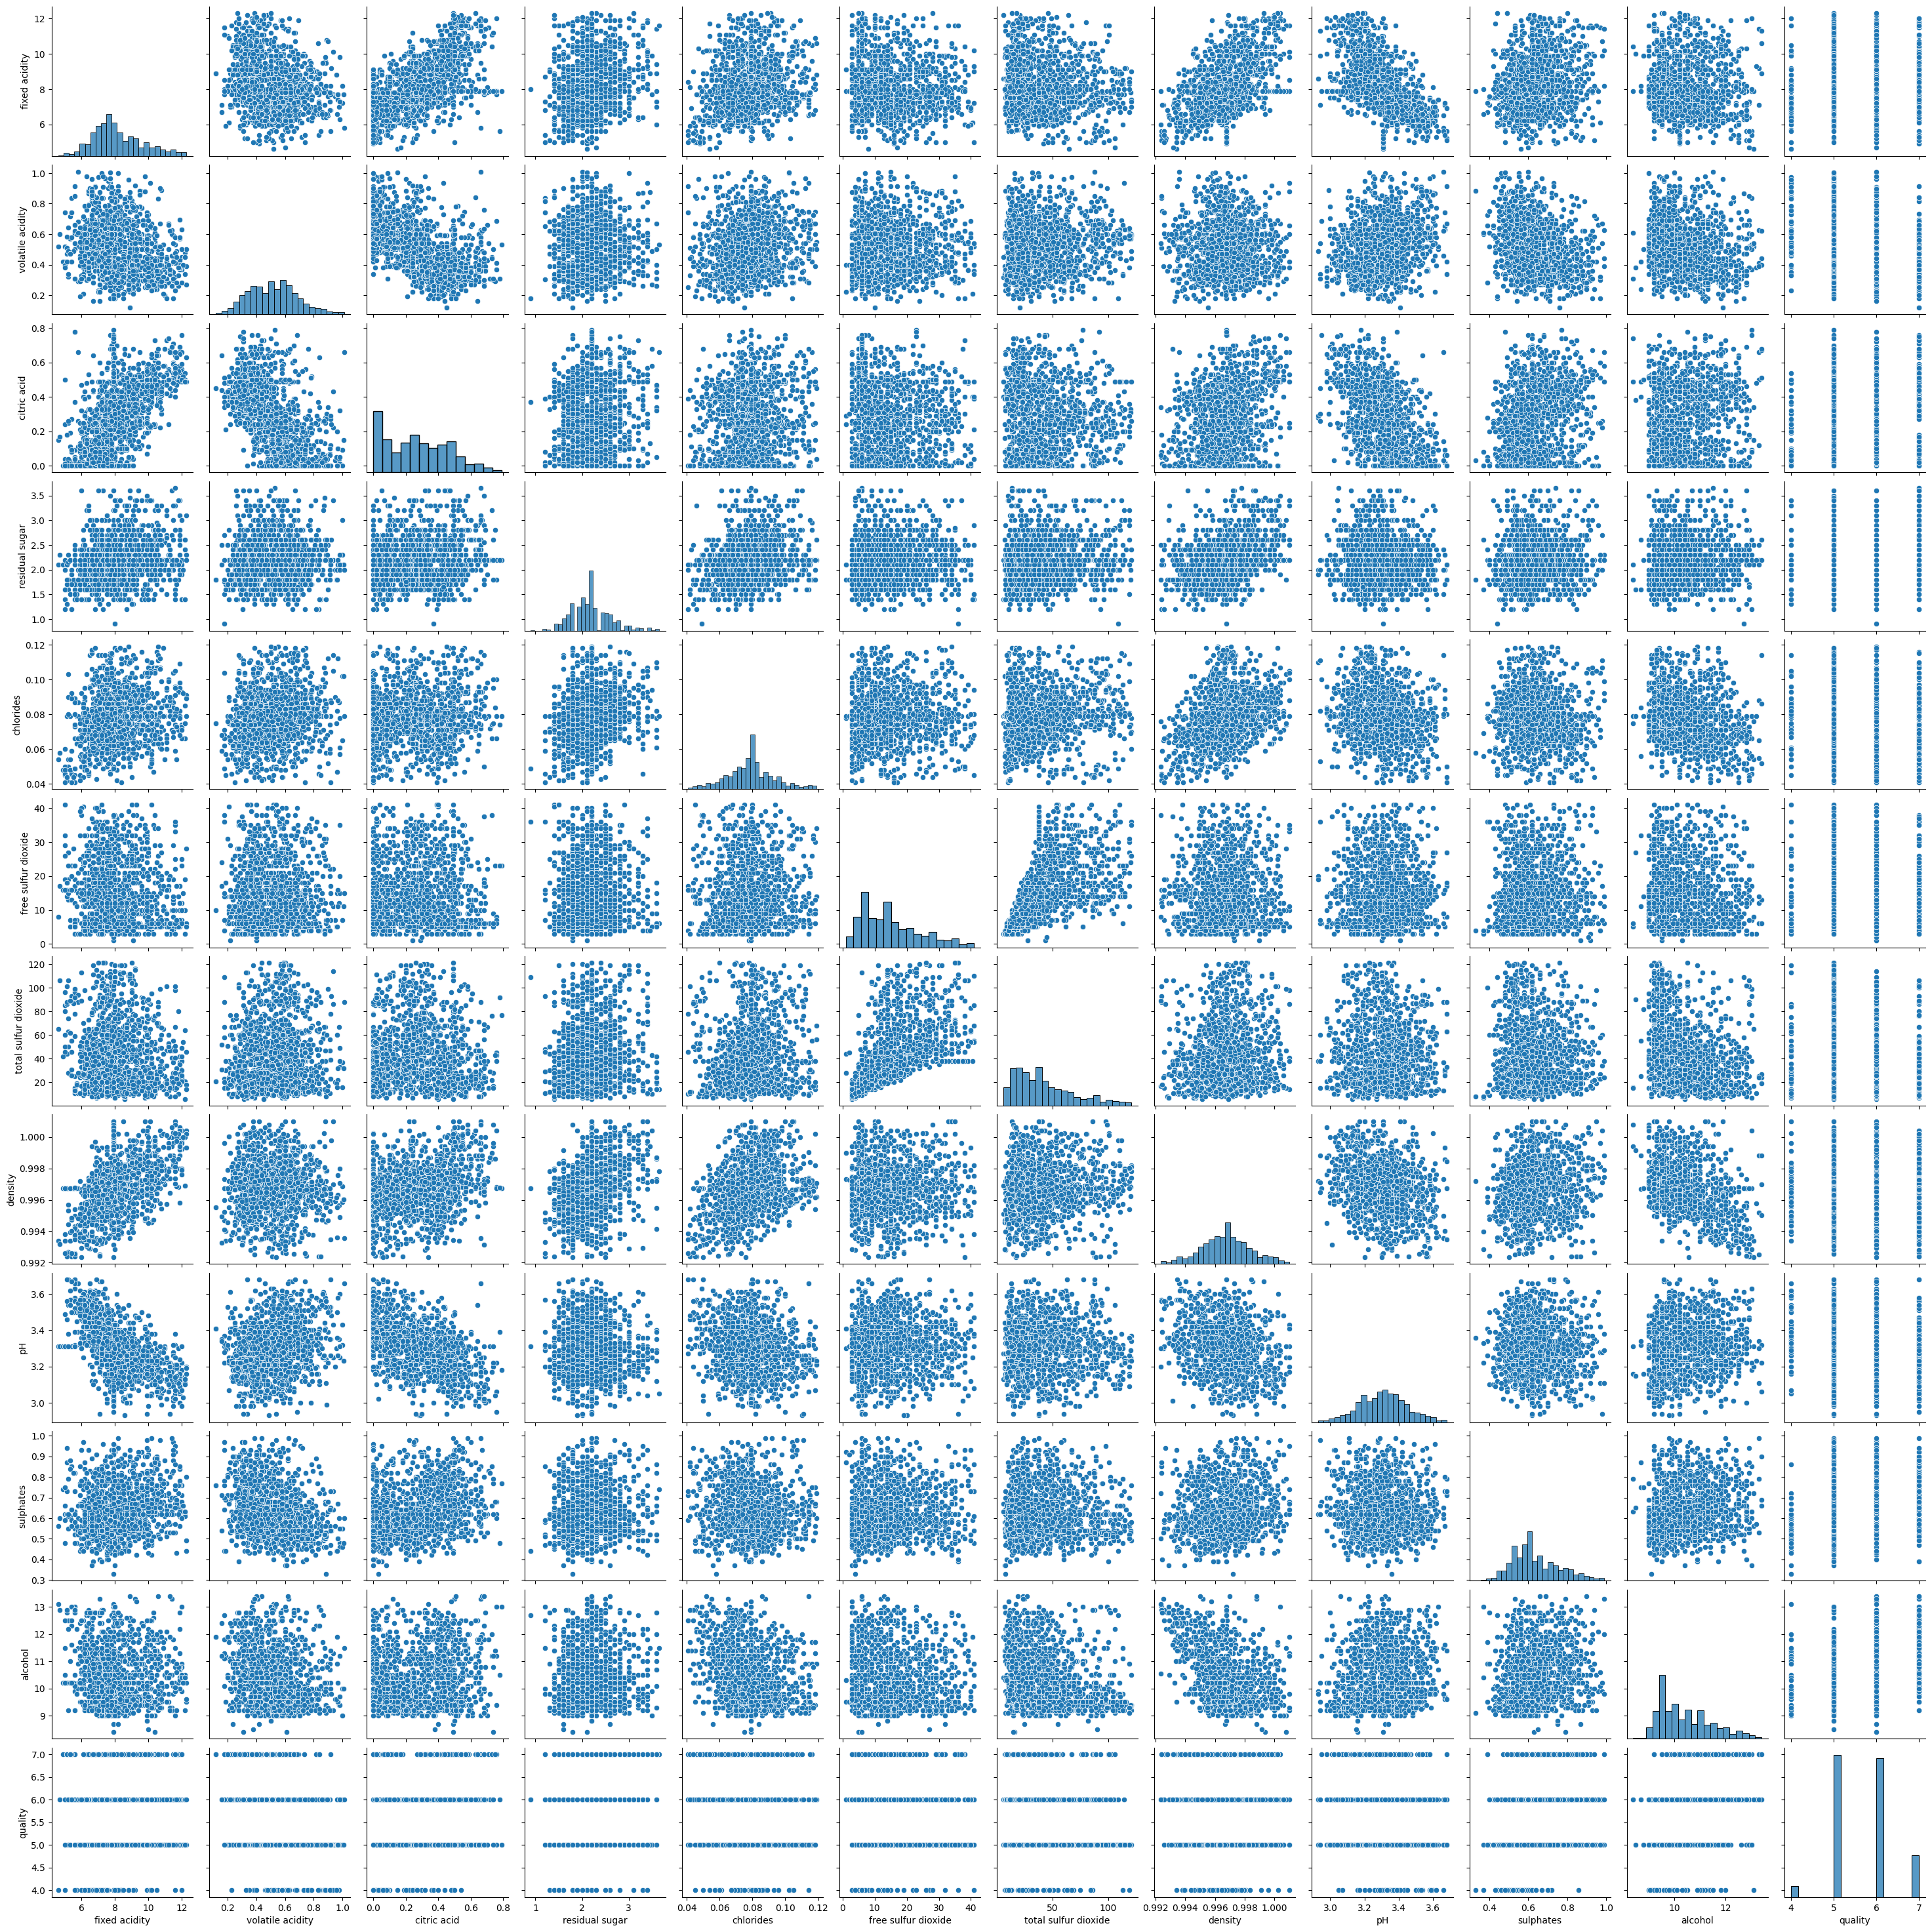

In [203]:
sns.pairplot(df)

<Axes: >

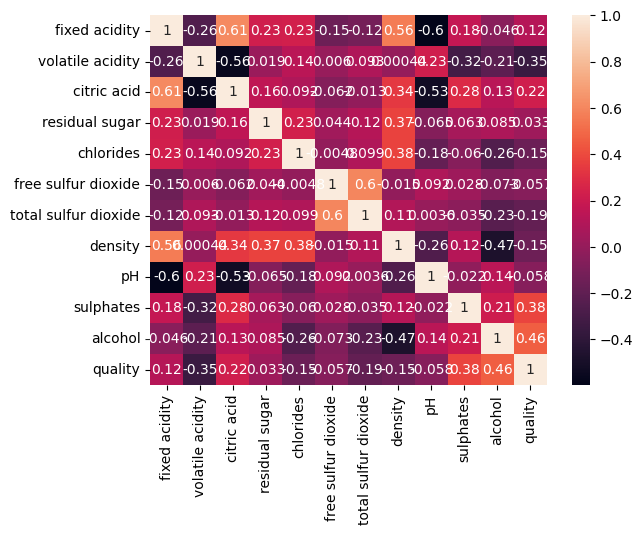

In [204]:
sns.heatmap(df.corr(),annot=True)

#Encoding the data

In [205]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [206]:
for col in df.columns:
  if df[col].dtype=='O':
    df[col]=le.fit_transform(df[col])

In [207]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0  
3      9.8      6.0  
4      9.4      5.0

#Split the data

In [208]:
#everything is encoded lets split the data
x=df.drop(columns=['quality'],axis=1)
y=df.quality

In [209]:
x.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [210]:
y.head()

0    5.0
1    5.0
2    5.0
3    6.0
4    5.0
Name: quality, dtype: float64

#Scale the data

In [211]:
#Now that encoding and split has been done lets scale the data
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()

In [212]:
x_scaled=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [213]:
x_scaled.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.263158              0.75    -0.787879            -0.6    -0.1875   
1      -0.052632              1.50    -0.787879             0.8     1.1875   
2      -0.052632              1.00    -0.666667             0.2     0.8125   
3       1.736842             -1.00     0.909091            -0.6    -0.2500   
4      -0.263158              0.75    -0.787879            -0.6    -0.1875   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.214286             -0.114286  0.495283  1.052632    -0.3750   
1             0.785714              0.828571  0.023585 -0.578947     0.3750   
2             0.071429              0.457143  0.117925 -0.263158     0.1875   
3             0.214286              0.628571  0.589623 -0.789474    -0.2500   
4            -0.214286             -0.114286  0.495283  1.052632    -0.3750   

    alcohol  
0 -0.533333  
1 -0.266667  
2 -0.266667  
3 -0.266667  
4 -0.533333

In [214]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=0)
x_train_scaled,x_test_scaled,y_train_scaled,y_test_scaled=train_test_split(x_scaled,y,train_size=0.2,random_state=0)

In [215]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model_scaled=RandomForestClassifier()
model.fit(x_train,y_train)
model_scaled.fit(x_train_scaled,y_train_scaled)

RandomForestClassifier()

In [216]:
y_pred=model.predict(x_test)
y_pred_scaled=model_scaled.predict(x_test_scaled)

In [217]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5890625

In [218]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_scaled,y_pred_scaled)

0.59765625

#Under sampling

In [219]:
#lets try undersampling the data
from imblearn.under_sampling import NearMiss
undersampler=NearMiss(version=2)


x_undersampled,y_undersampled=undersampler.fit_resample(x,y)


from sklearn.model_selection import train_test_split
x_train_us,x_test_us,y_train_us,y_test_us=train_test_split(x_undersampled,y_undersampled,test_size=0.2,random_state=0)

#Model Training and Evaluation

In [220]:
from sklearn.ensemble import RandomForestClassifier
model_under_sampled=RandomForestClassifier()

model_under_sampled.fit(x_train_us,y_train_us)

y_pred_us=model_under_sampled.predict(x_test_us)

from sklearn.metrics import accuracy_score
accuracy_score(y_test_us,y_pred_us)

0.8837209302325582

**training accuracy**

In [221]:
y_pred_us_train=model_under_sampled.predict(x_train_us)
accuracy_score(y_train_us,y_pred_us_train)

1.0

In [222]:
from sklearn.metrics import classification_report
classification_report(y_test_us,y_pred_us)

'              precision    recall  f1-score   support\n\n         4.0       1.00      0.57      0.73         7\n         5.0       0.83      0.91      0.87        11\n         6.0       0.85      0.92      0.88        12\n         7.0       0.93      1.00      0.96        13\n\n    accuracy                           0.88        43\n   macro avg       0.90      0.85      0.86        43\nweighted avg       0.89      0.88      0.88        43\n'

#Model is overfitting lets try hyperparameter tuning

In [223]:
from sklearn.ensemble import RandomForestClassifier
model_under_sampled=RandomForestClassifier(max_depth=4)

model_under_sampled.fit(x_train_us,y_train_us)

y_pred_us=model_under_sampled.predict(x_test_us)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_us,y_pred_us))
y_pred_us_train=model_under_sampled.predict(x_train_us)
print(accuracy_score(y_train_us,y_pred_us_train))
from sklearn.metrics import classification_report
classification_report(y_test_us,y_pred_us)

0.7674418604651163
0.9053254437869822


'              precision    recall  f1-score   support\n\n         4.0       1.00      0.43      0.60         7\n         5.0       0.77      0.91      0.83        11\n         6.0       0.67      0.83      0.74        12\n         7.0       0.83      0.77      0.80        13\n\n    accuracy                           0.77        43\n   macro avg       0.82      0.74      0.74        43\nweighted avg       0.80      0.77      0.76        43\n'

**Dropping few columns as they have like ~0.0xxx corealtion to quality aka the target attribute**

In [180]:
from sklearn.ensemble import RandomForestClassifier
model_under_sampled=RandomForestClassifier(max_depth=4)

model_under_sampled.fit(x_train_us.drop(columns=['pH','free sulfur dioxide','residual sugar'],axis=1),y_train_us)

y_pred_us=model_under_sampled.predict(x_test_us.drop(columns=['pH','free sulfur dioxide','residual sugar'],axis=1))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_us,y_pred_us))
y_pred_us_train=model_under_sampled.predict(x_train_us.drop(columns=['pH','free sulfur dioxide','residual sugar'],axis=1))
print(accuracy_score(y_train_us,y_pred_us_train))
from sklearn.metrics import classification_report
classification_report(y_test_us,y_pred_us)

0.8372093023255814
0.893491124260355


'              precision    recall  f1-score   support\n\n         4.0       1.00      0.57      0.73         7\n         5.0       0.79      1.00      0.88        11\n         6.0       0.82      0.75      0.78        12\n         7.0       0.86      0.92      0.89        13\n\n    accuracy                           0.84        43\n   macro avg       0.87      0.81      0.82        43\nweighted avg       0.85      0.84      0.83        43\n'

In [181]:
from sklearn.linear_model import LogisticRegression
model_under_sampled=LogisticRegression()

model_under_sampled.fit(x_train_us.drop(columns=['pH','free sulfur dioxide','residual sugar'],axis=1),y_train_us)

y_pred_us=model_under_sampled.predict(x_test_us.drop(columns=['pH','free sulfur dioxide','residual sugar'],axis=1))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_us,y_pred_us))
y_pred_us_train=model_under_sampled.predict(x_train_us.drop(columns=['pH','free sulfur dioxide','residual sugar'],axis=1))
print(accuracy_score(y_train_us,y_pred_us_train))
from sklearn.metrics import classification_report
classification_report(y_test_us,y_pred_us)

0.6744186046511628
0.650887573964497


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'              precision    recall  f1-score   support\n\n         4.0       1.00      0.43      0.60         7\n         5.0       0.65      1.00      0.79        11\n         6.0       0.56      0.42      0.48        12\n         7.0       0.71      0.77      0.74        13\n\n    accuracy                           0.67        43\n   macro avg       0.73      0.65      0.65        43\nweighted avg       0.70      0.67      0.66        43\n'

In [227]:
#randomforestclassifier with hyperparameter seems to be performing the best with ~88 % accuracy , classification metric scores like recall,precision,support are supporting the above accuracy score

In [183]:
print(x_train.shape)

(319, 11)


#Random Value Prediction

In [226]:
random_values = [
    [7.1, 0.32, 0.25, 2.4, 0.069, 35, 70, 0.9959, 3.42, 0.61, 10.2],
    [6.5, 0.45, 0.22, 2.5, 0.065, 30, 55, 0.996, 3.38, 0.58, 9.5],
    [8.2, 0.61, 0.08, 2.2, 0.072, 15, 35, 0.9946, 3.24, 0.42, 11.8],
    [7.6, 0.34, 0.27, 2.3, 0.083, 18, 56, 0.9963, 3.37, 0.58, 9.9],
    [9.0, 0.78, 0.12, 2.5, 0.088, 22, 64, 0.9972, 3.28, 0.51, 10.1]
]

random_values = np.array(random_values)

# Make predictions on the random features
predictions = model_under_sampled.predict(random_values)

# Display the predictions
for i, pred in enumerate(predictions, start=1):
    print(f"Prediction {i}: {pred}")

Prediction 1: 6.0
Prediction 2: 6.0
Prediction 3: 4.0
Prediction 4: 6.0
Prediction 5: 5.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
